In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [6]:
data_set=pd.read_csv(r"C:\Users\rupas\OneDrive\Desktop\jupyter\project\employee list.csv")

In [7]:
data_set

,age,workclass,fnlwgt,education,edu_data,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data_set.shape

(48842, 15)

In [9]:
data_set.isna().sum

<bound method DataFrame.sum of          age  workclass  fnlwgt  education  edu_data  marital_status  \
0      False      False   False      False     False           False   
1      False      False   False      False     False           False   
2      False      False   False      False     False           False   
3      False      False   False      False     False           False   
4      False      False   False      False     False           False   
...      ...        ...     ...        ...       ...             ...   
48837  False      False   False      False     False           False   
48838  False      False   False      False     False           False   
48839  False      False   False      False     False           False   
48840  False      False   False      False     False           False   
48841  False      False   False      False     False           False   

       occupation  relationship   race  gender  capital_gain  capital_loss  \
0           False         

In [10]:
columns_to_replace = ['age','workclass','fnlwgt','education','edu_data','marital_status',
                      'occupation','relationship','race','gender','capital_gain','capital_loss','hours_per_week','native_country','income']
for column in columns_to_replace:
 data_set[column] = data_set[column].replace("?", "Others")

In [11]:
data_set=data_set[data_set['workclass']!='Without-pay']
data_set=data_set[data_set['workclass']!='Never-worked']
data_set = data_set[(data_set['age'] >= 20) & (data_set['age'] <= 70)]
data_set=data_set[data_set['edu_data']!=1]
data_set=data_set[data_set['edu_data']!=2]
data_set=data_set[data_set['marital_status']!='Married-AF-spouse']
data_set=data_set[data_set['occupation']!='Armed-Forces']
data_set=data_set[data_set['occupation']!='Priv-house-serv']

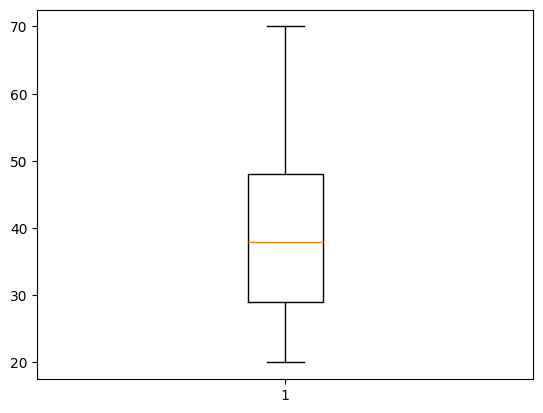

In [12]:
plt.boxplot(data_set[(data_set['age']>=17) & (data_set['age']<=75)]['age'])
plt.show()

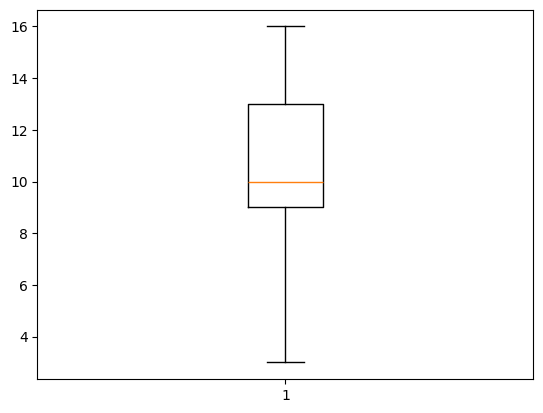

In [13]:
plt.boxplot(data_set['edu_data'])
plt.show()

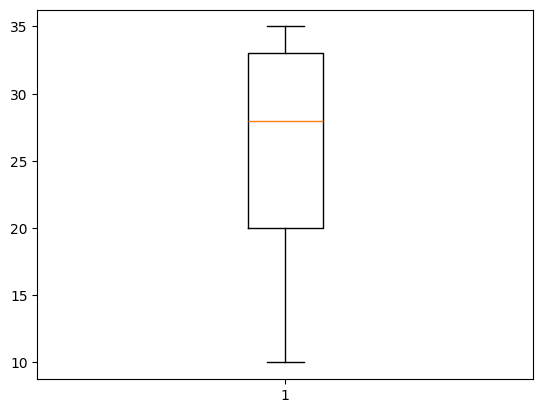

In [14]:
plt.boxplot(data_set[(data_set['hours_per_week']>=10) & (data_set['hours_per_week']<=35)]['hours_per_week'])
plt.show()

In [15]:
data_set=data_set.drop(columns=['education'])

In [16]:
data_set.shape

(44905, 14)

In [17]:
data2=data_set['income']

In [18]:
data1=data_set.drop(columns=['income'])

In [19]:
data1.shape

(44905, 13)

In [20]:
encoder=LabelEncoder()

In [21]:
data1['workclass'] = encoder.fit_transform(data1['workclass'])
data1['fnlwgt'] = encoder.fit_transform(data1['fnlwgt'])
data1['edu_data'] = encoder.fit_transform(data1['edu_data'])
data1['marital_status'] = encoder.fit_transform(data1['marital_status'])
data1['occupation'] = encoder.fit_transform(data1['occupation'])
data1['relationship'] = encoder.fit_transform(data1['relationship'])
data1['race'] = encoder.fit_transform(data1['race'])
data1['gender'] = encoder.fit_transform(data1['gender'])
data1['capital_gain'] = encoder.fit_transform(data1['capital_gain'])
data1['capital_loss'] = encoder.fit_transform(data1['capital_loss'])
data1['hours_per_week'] = encoder.fit_transform(data1['hours_per_week'])
data1['native_country'] = encoder.fit_transform(data1['native_country'])

In [22]:
Scaler=MinMaxScaler()
data=Scaler.fit_transform(data1)

In [23]:
data1_train, data1_test, data2_train, data2_test = train_test_split(data1, data2, test_size=0.2, random_state=3, stratify=data2)

In [24]:
Gradient=GradientBoostingClassifier()
Gradient.fit(data1_train,data2_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [25]:
Predict=Gradient.predict(data1_test)
accuracy_score(data2_test,Predict)

0.8605945885758824

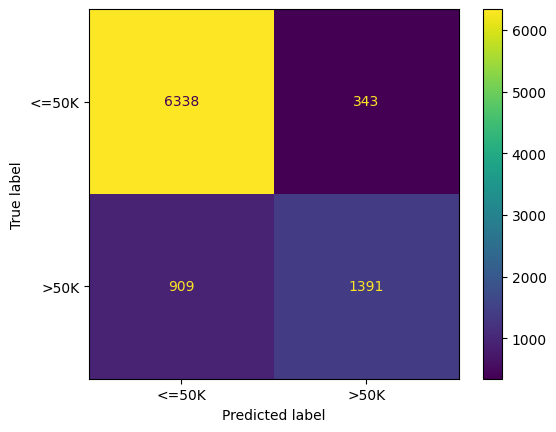

In [26]:
cm=confusion_matrix(data2_test,Predict,labels=Gradient.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=Gradient.classes_)
display.plot()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(data1_train,data2_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [28]:
Predict=RF.predict(data1_test)
accuracy_score(data2_test,Predict)

0.8497940095757711

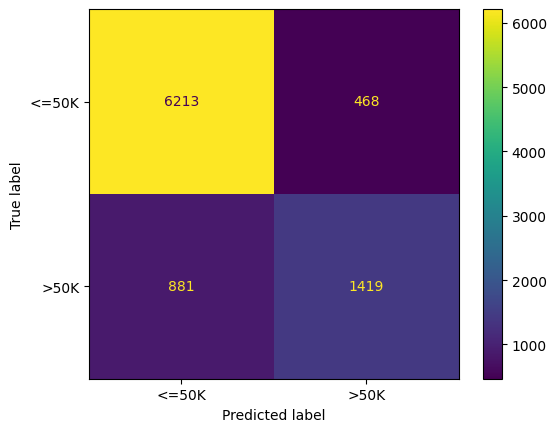

In [32]:
cm=confusion_matrix(data2_test,Predict,labels=RF.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
display.plot()
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
LogisticRegression.fit(data1_train,data2_train)

C:\Users\rupas\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [34]:
Predict=LogisticRegression.predict(data1_test)
accuracy_score(data2_test,Predict)

0.7946776528226256

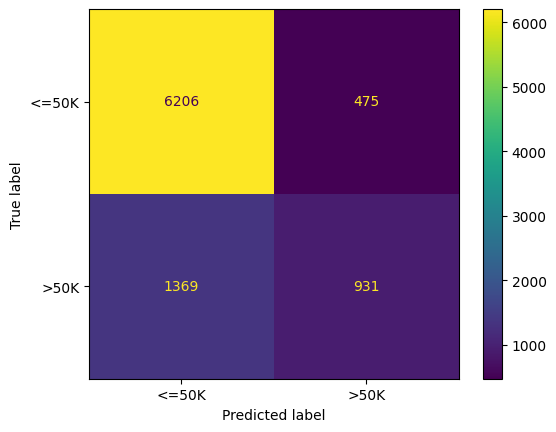

In [35]:
cm=confusion_matrix(data2_test,Predict,labels=LogisticRegression.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LogisticRegression.classes_)
display.plot()
plt.show()

In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(data1_train,data2_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [37]:
Predict=KNN.predict(data1_test)
accuracy_score(data2_test,Predict)

0.757153991760383

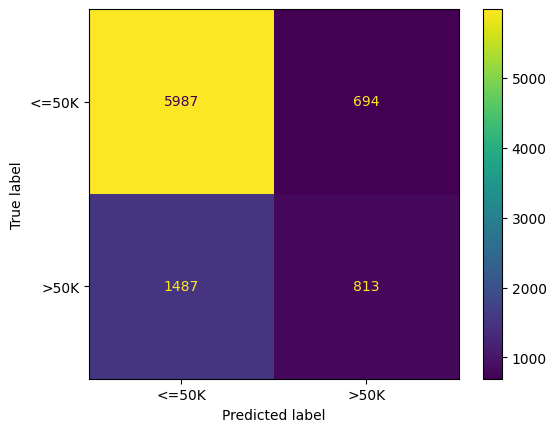

In [38]:
cm=confusion_matrix(data2_test,Predict,labels=KNN.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=KNN.classes_)
display.plot()
plt.show()

In [39]:
from sklearn.svm import SVC
S=SVC()
S.fit(data1_train,data2_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
Predict=S.predict(data1_test)
accuracy_score(data2_test,Predict)

0.7439037969045763

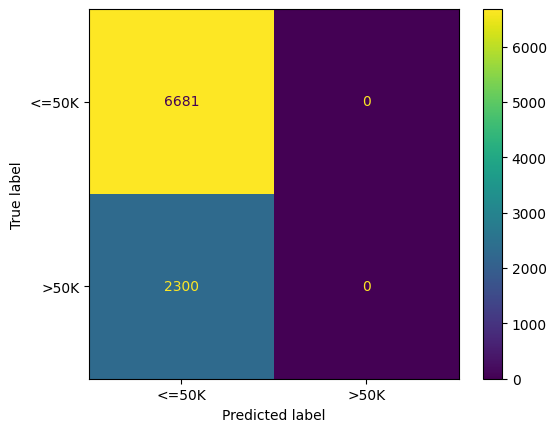

In [45]:
cm=confusion_matrix(data2_test,Predict,labels=S.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=S.classes_)
display.plot()
plt.show()

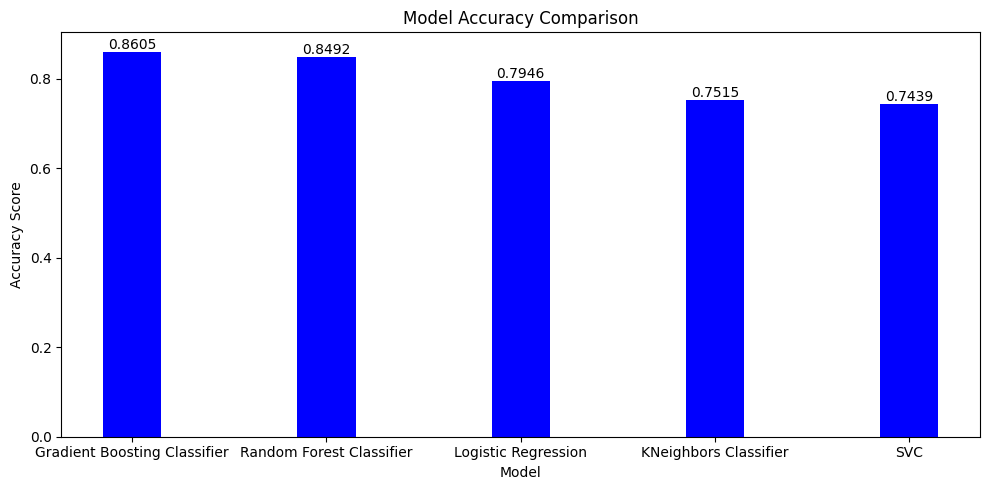

In [63]:
import matplotlib.pyplot as plt

result = {'Gradient Boosting Classifier': 0.8605, 'Random Forest Classifier': 0.8492, 'Logistic Regression': 0.7946,'KNeighbors Classifier':0.7515,'SVC':0.7439}

accuracy = list(result.values())  # Replace data with result
model = list(result.keys())  # Replace data with result

fig, ax = plt.subplots(figsize=(10,5))
bars = ax.bar(model, accuracy, facecolor='blue', width=0.3)
ax.set_xlabel('Model')  # Capitalize 'Model' for consistency
ax.set_ylabel('Accuracy Score')  # Capitalize 'Accuracy Score' for consistency
ax.set_title('Model Accuracy Comparison')  # Add a title for clarity
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()  # Ensure labels fit within the figure area
plt.show()


In [64]:
result

{'Gradient Boosting Classifier': 0.8605,
 'Random Forest Classifier': 0.8492,
 'Logistic Regression': 0.7946,
 'KNeighbors Classifier': 0.7515,
 'SVC': 0.7439}